# [Árbol de decisión](https://scikit-learn.org/stable/modules/tree.html#)

Es un algoritmo de aprendizaje supervizado tanto de regresión como de clasificación muy utilizados, ya que hay otros algoritmos que salen de este. Fue creado por Leo Breiman.

Aprende de los datos generando reglas de tipo if-else, dividiendo el "arbol" en nodos, cuando uno de estos no tiene divisiones se le conoce como nodo hoja.

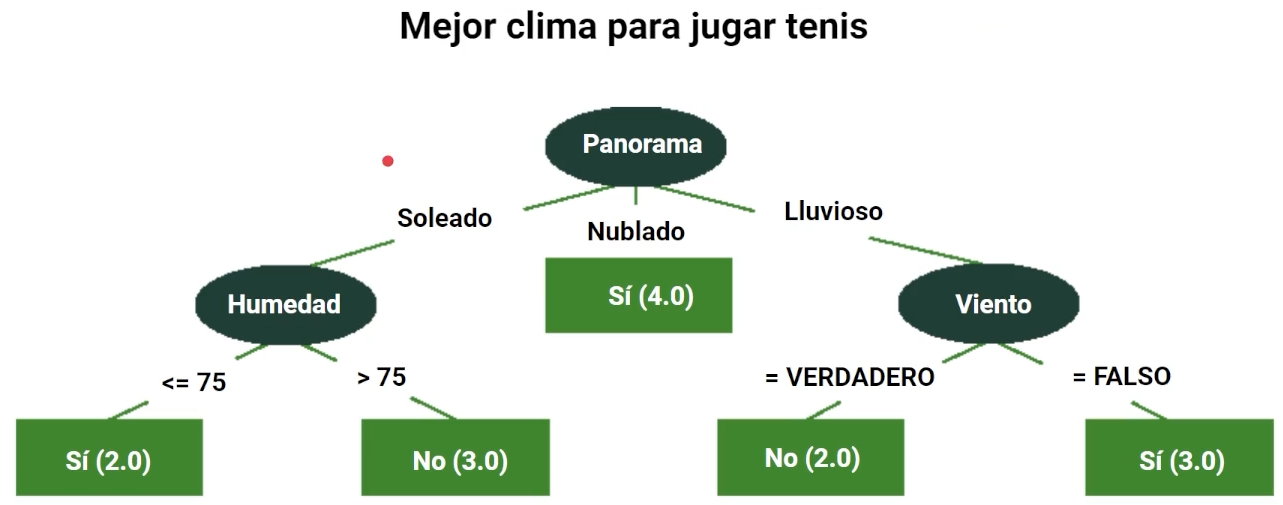

## Terminología

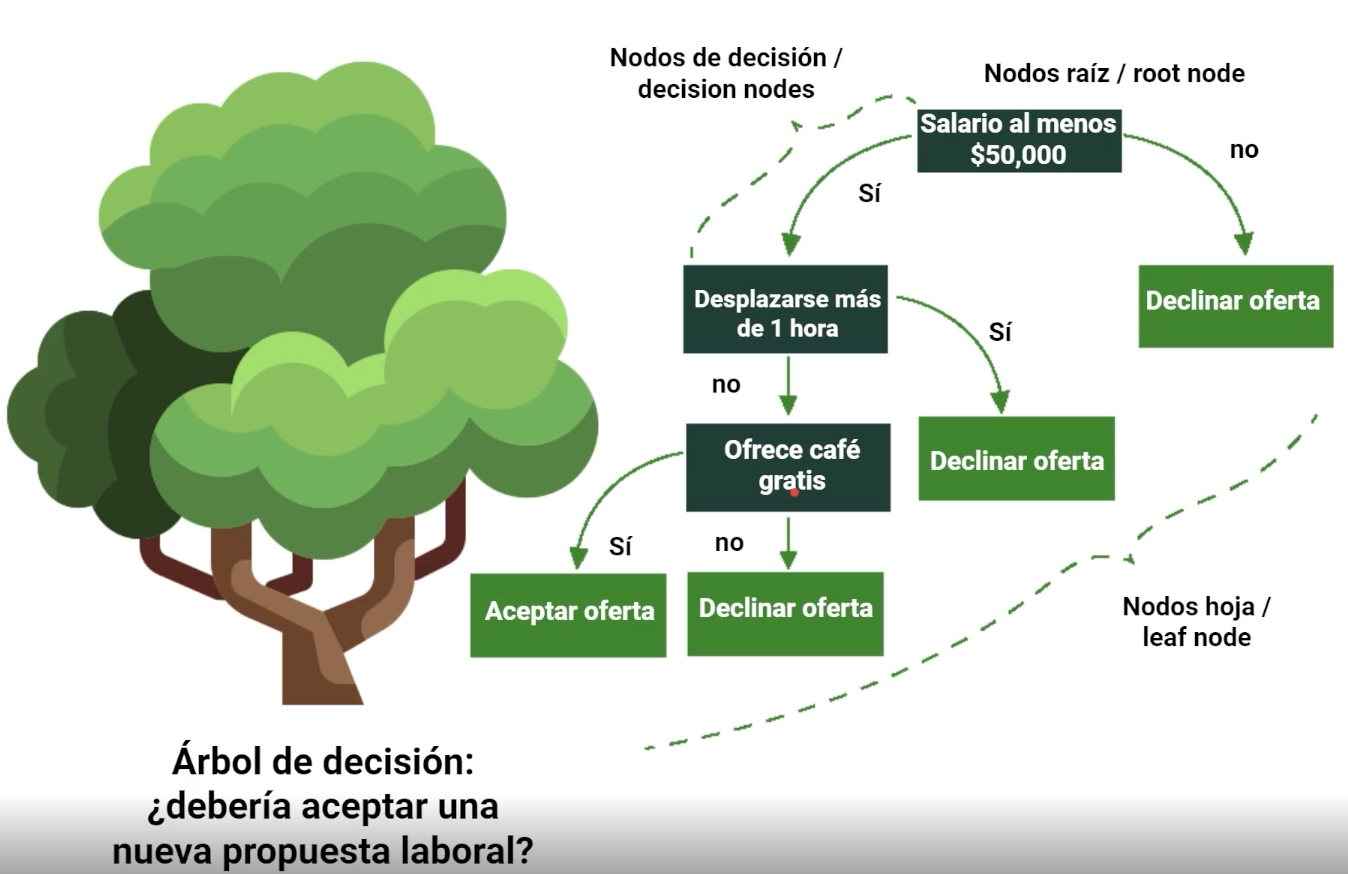

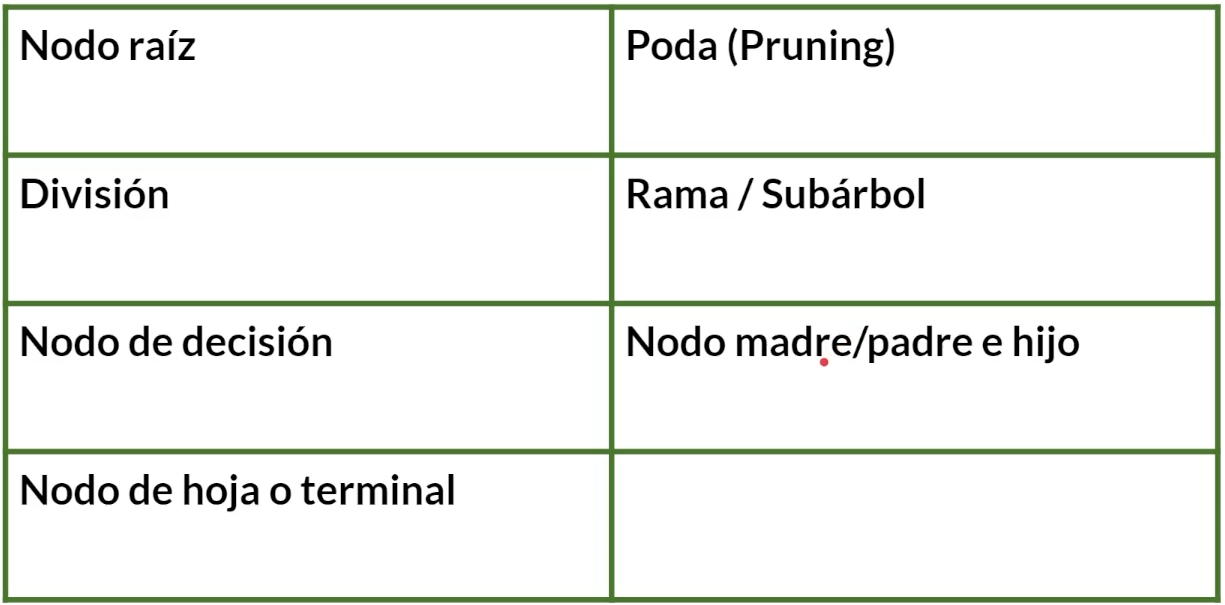

## ¿Cuándo usarlos?

- Sencillo y fácil de entender
- Funcionan bien con grandes cantidades de datos
- Relativamente Robusto
- Es un método muy fácil para analizar datos cuantitativos
- Aplica para clasificación y regresión

Se le conocen como un algoritmo de caja blanca, ya que se puede conocer como trabaja internamente el algoritmo y como llega a los resultados, pueden dar pie a usar Random Forest, un algoritmo robusto.

Lo malo es que tienden al overfitting, se ven afecta

|Ventajas   |Desventajas   |
|---|---|
|Algoritmo de caja blanca   |Tienden al overfitting   |
|Resultados fáciles de entender   |Se ven influenciados por los outliers   |
|Sus combinaciones pueden ser certeras (Random Forest)   |Crear árboles demasiado complejos puede conllevar a que no se adapten bien a los nuevos datos   |
|   |Se puede crear árboles sesfados si las clases están balanceadas   |


## Métricas

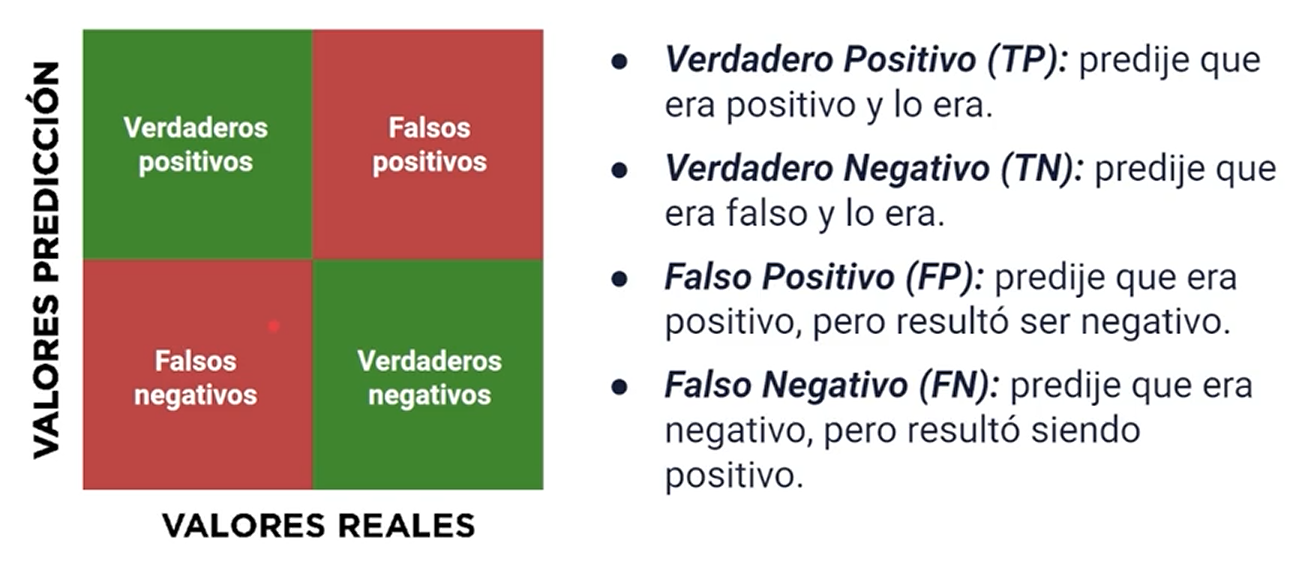

- **Accuracy:** Es la proporción entre los positivos reales predichos y todos los casos positivos, lo ideal es tener un valor cercano a 1 (Entre 0.8 y 0.9): $$\frac{(VP+VN)}{(VP+FP+FN+VN)}$$

- **Precision:** Nos ayuda a medir la dispersión del conjunto de valores obtenidos a partir de mediciones repetidas de una magnitud, cuento menos es la dispersión mayor la precisión. Es la proporción entre el número de predicciones correctas y el total de predicciones, osea el porcentaje de casos positivos detectados: $$\frac{(VP)}{(VP+FP)}$$

- **Sensibilidad o recall:** Es la tasa de verdaderos positivos: $$\frac{(VP)}{(VP+FN)}$$

- **Especificidad:** Tasa de verdaderos negativos: $$\frac{(VN)}{(VN+FP)}$$

- **F1-score:** Es de las métricas más robustas:
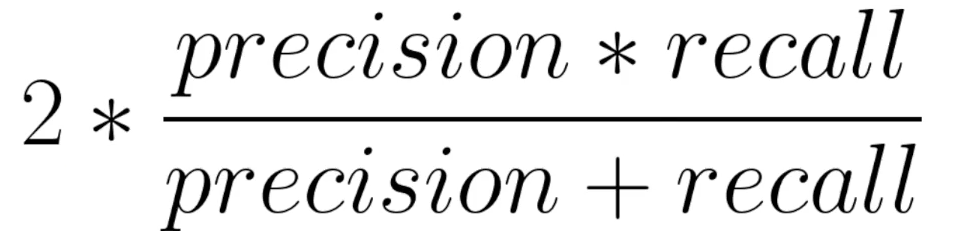

## Primer árbol de decisión

### Importar librerías

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, learning_curve
import matplotlib.pyplot as plt
import seaborn as sns

### Exploración de [datos](https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html)

In [2]:
titanic = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


#### Eliminar columnas innecesarias

In [3]:
titanic.drop(["Name", "Fare"], axis=1, inplace=True)

#### Renombrar columnas

In [4]:
titanic.rename({"Siblings/Spouses Aboard":"SibSp"
                , "Parents/Children Aboard":"Parch"}, axis=1, inplace=True)

#### Analisis de datos

In [5]:
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
dtype: object

Cambiar sex a numérica

In [6]:
titanic = pd.get_dummies(titanic, drop_first=True)
titanic.rename({"Sex_male":"Sex"}, axis=1, inplace=True)
titanic.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Sex            bool
dtype: object

### Entrenamiento del arbol

In [7]:
X = titanic.drop("Survived", axis=1)
y = titanic["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=00000)

In [8]:
tree = DecisionTreeClassifier(
    max_depth=2, # Como tenemos pocas filas, usaremos poca profundidad
    random_state=00000
)

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

### Evaluación del modelo

In [9]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [10]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [11]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Entrenamiento:", train_accuracy)
print("Testing:", test_accuracy)

Entrenamiento: 0.8048387096774193
Testing: 0.7640449438202247


Nuestros accuracy en ambos casos son similares, por lo que es un buen indicador para saber que no hay overfitting

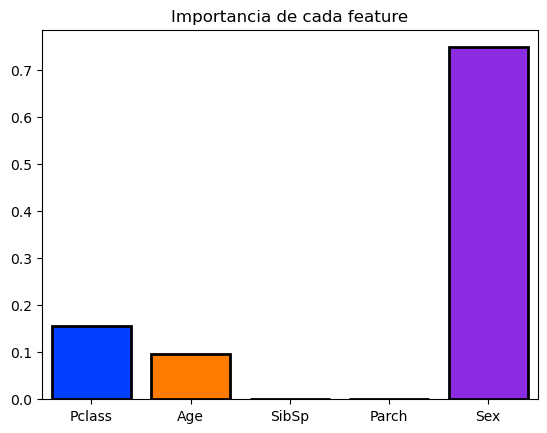

In [12]:
importances = tree.feature_importances_
columns = X.columns

sns.barplot(x=columns, hue=columns, y=importances, palette="bright",
            saturation=2.0, edgecolor="black", linewidth=2,
            legend=False)
plt.title("Importancia de cada feature")
plt.xlabel("")
plt.show()

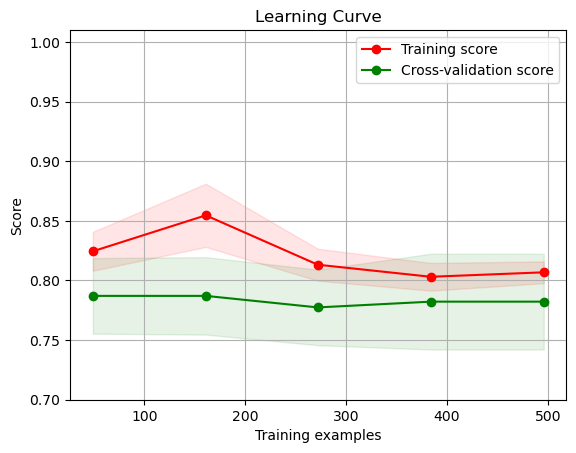

In [13]:
plot_learning_curve(tree, "Learning Curve", X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=-1)
plt.show()

Podemos concluir que las variables SibSp y Parch no son relevantes para el modelo, por lo que podemos considerar eliminarlas para tener un modelo más sencillo.

### Eligiendo un mejor modelo

In [14]:
# Definir el clasificador y los valores de los hiperparámetros a probar
tree = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy', "log_loss"],
              'max_depth': [2, 3, 4, 5]}

K = KFold(n_splits=10)

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(tree, param_grid=param_grid, cv=K)
grid_search.fit(X_train, y_train)

# Imprimir los resultados
print("Mejores hiperparámetros encontrados: ",end="")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada: ",end="")
print(grid_search.best_score_)

# Modelo con parametros optimizados
best_tree = grid_search.best_estimator_

# Predecimos Y
y_train_pred = best_tree.predict(X_train)
y_test_pred = best_tree.predict(X_test)

print('El accuracy en train es:',accuracy_score(y_train,y_train_pred))
print('El accuracy en test es:', accuracy_score(y_test,y_test_pred))

# Importamos matriz de confusion
confusion_matrix(y_test, y_test_pred)

Mejores hiperparámetros encontrados: {'criterion': 'gini', 'max_depth': 3}
Mejor puntuación de validación cruzada: 0.8096774193548386
El accuracy en train es: 0.8290322580645161
El accuracy en test es: 0.8089887640449438


array([[140,  22],
       [ 29,  76]], dtype=int64)

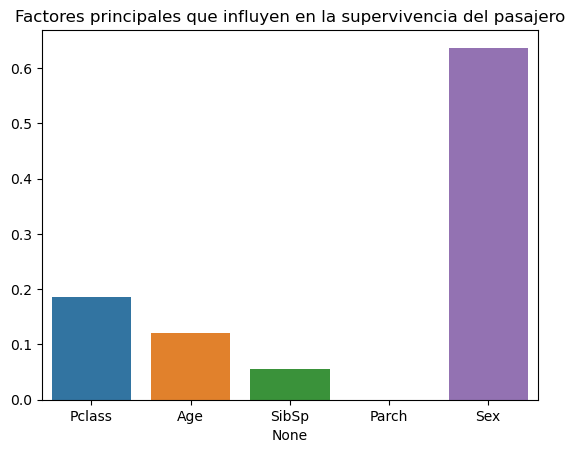

In [15]:
# Verificamos el feature importances
importances = best_tree.feature_importances_
columns = X.columns

sns.barplot(x=columns, hue=columns, y=importances);
plt.title('Factores principales que influyen en la supervivencia del pasajero');

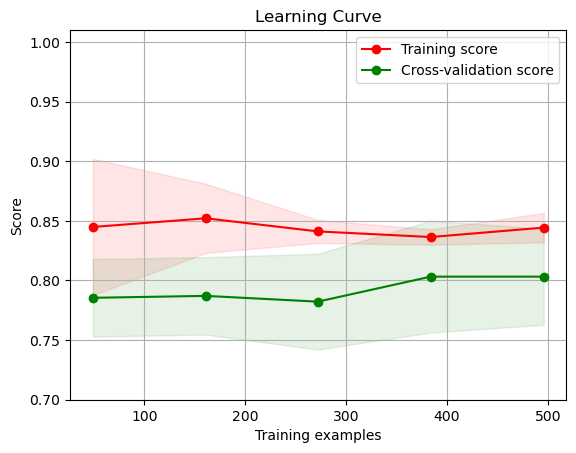

In [16]:
plot_learning_curve(grid_search, "Learning Curve", X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=-1)
plt.show()

In [17]:
best_tree.predict(X_test).sum() == grid_search.predict(X_test).sum()

True

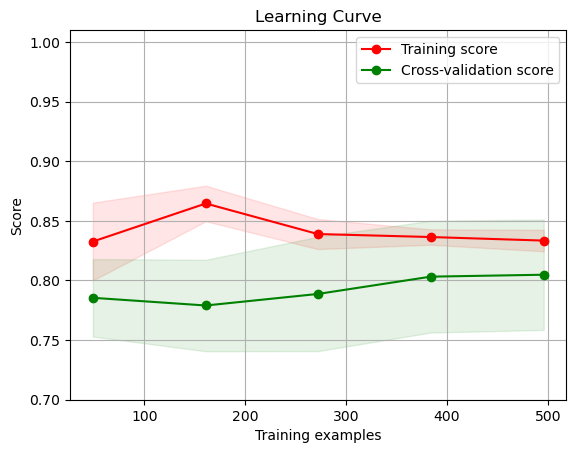

In [18]:
plot_learning_curve(best_tree, "Learning Curve", X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=-1)
plt.show()

## Car Evaluation

Para este proyecto se usará un [dataset](https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set) de UCI

### Cargar librerías

In [30]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

### Cargando los datos

In [20]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', 
                 header=None, names=['price','maint','doors','persons','lug_boot','safety','class'])

### Análisis exploratorio

In [21]:
df.head()

,price,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [22]:
df.shape

(1728, 7)

In [23]:
df.dtypes # inicialmente tenemos solo datos categóricas

price       object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [24]:
df["class"].value_counts(normalize=True)

class
unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: proportion, dtype: float64

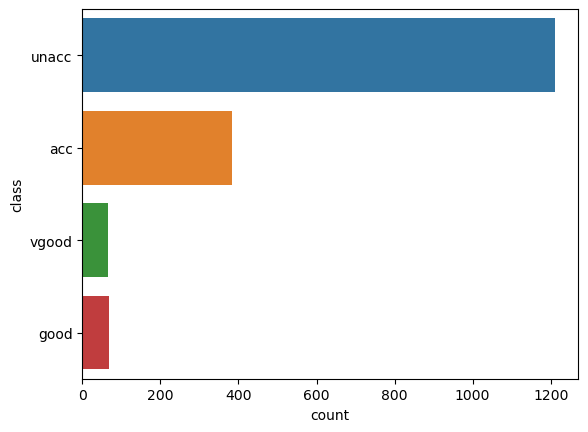

In [25]:
sns.countplot(df, y="class", hue="class")
plt.show()

In [26]:
df.isnull().sum()

price       0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

### Procesamiento de datos

In [51]:
X = df.drop("class", axis=1)
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state=42, 
                                                    # stratify = y # Garantiza que la distribución de clases se conserve
                                                    ) 

y_train.value_counts()

class
unacc    852
acc      266
good      50
vgood     41
Name: count, dtype: int64

In [52]:
X_train

,price,maint,doors,persons,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med
...,...,...,...,...,...,...
1130,med,med,3,more,med,high
1294,med,low,5more,more,big,med
860,high,low,5more,more,med,high
1459,low,high,4,2,small,med


### Entrenamiento del modelo

In [53]:
encoder = ce.OrdinalEncoder(cols=['price', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [54]:
X_train.head()

,price,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


In [55]:
tree = DecisionTreeClassifier(max_depth=2, random_state=42)

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [56]:
# Definir el clasificador y los valores de los hiperparámetros a probar
model = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy', "log_loss"],
              'max_depth': [2, 3, 4, 5]}

K = KFold(n_splits=10)

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
clf = GridSearchCV(model, param_grid=param_grid, cv=K)
clf.fit(X_train, y_train)

# Imprimir los resultados
print("Mejores hiperparámetros encontrados: ",end="")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada: ",end="")
print(grid_search.best_score_)

# Predecimos Y
y_train_pred_tree_clf = clf.predict(X_train)
y_test_pred_tree_clf = clf.predict(X_test)

print('El accuracy en train es:',accuracy_score(y_train,y_train_pred_tree_clf))
print('El accuracy en test es:', accuracy_score(y_test,y_test_pred_tree_clf))

# Importamos matriz de confusion
confusion_matrix(y_test, y_test_pred_tree_clf)

Mejores hiperparámetros encontrados: {'criterion': 'gini', 'max_depth': 3}
Mejor puntuación de validación cruzada: 0.8096774193548386
El accuracy en train es: 0.8461538461538461
El accuracy en test es: 0.8342967244701349


array([[ 76,   2,  36,   4],
       [  8,   6,   5,   0],
       [ 14,   0, 344,   0],
       [ 14,   3,   0,   7]], dtype=int64)

In [57]:
print(classification_report(y_test, y_test_pred_tree_clf))

              precision    recall  f1-score   support

         acc       0.68      0.64      0.66       118
        good       0.55      0.32      0.40        19
       unacc       0.89      0.96      0.93       358
       vgood       0.64      0.29      0.40        24

    accuracy                           0.83       519
   macro avg       0.69      0.55      0.60       519
weighted avg       0.82      0.83      0.82       519



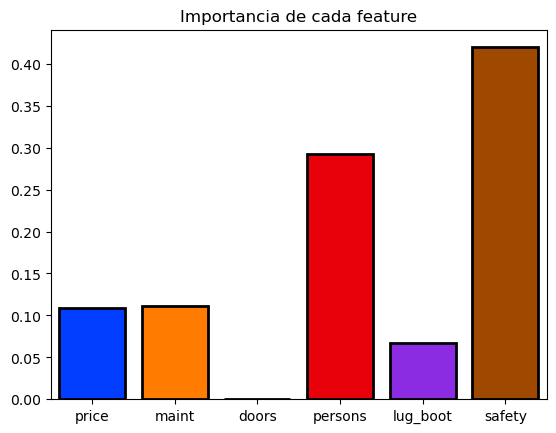

In [58]:
importances = clf.best_estimator_.feature_importances_
columns = X.columns
data = pd.DataFrame([importances], columns=columns)
sns.barplot(data,
            palette = 'bright',
            saturation = 2.0,
            edgecolor = 'black',
            linewidth = 2)
plt.title('Importancia de cada feature')
plt.show()

### Evaluando el modelo

In [59]:
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

print('El accuracy en train es:',accuracy_score(y_train,y_train_pred_tree))
print('El accuracy en test es:', accuracy_score(y_test,y_test_pred_tree))

# Importamos matriz de confusion
confusion_matrix(y_test, y_test_pred_tree)

El accuracy en train es: 0.7733664185277088
El accuracy en test es: 0.7591522157996147


array([[ 57,   0,  61,   0],
       [  9,   0,  10,   0],
       [ 21,   0, 337,   0],
       [ 24,   0,   0,   0]], dtype=int64)

In [60]:
print(classification_report(y_test, y_test_pred_tree))

              precision    recall  f1-score   support

         acc       0.51      0.48      0.50       118
        good       0.00      0.00      0.00        19
       unacc       0.83      0.94      0.88       358
       vgood       0.00      0.00      0.00        24

    accuracy                           0.76       519
   macro avg       0.33      0.36      0.34       519
weighted avg       0.69      0.76      0.72       519



c:\Users\shani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\shani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\shani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


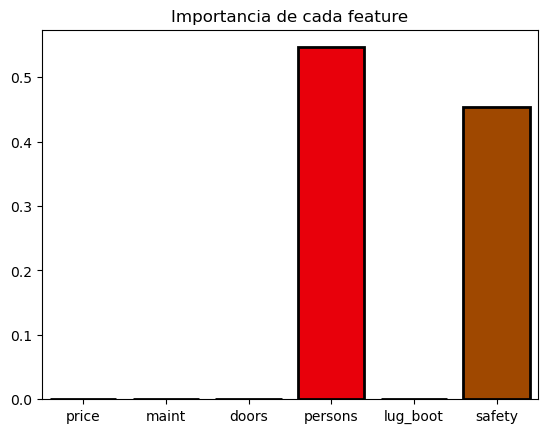

In [61]:
importances = tree.feature_importances_
columns = X.columns
data = pd.DataFrame([importances], columns=columns)
sns.barplot(data,
            palette = 'bright',
            saturation = 2.0,
            edgecolor = 'black',
            linewidth = 2)
plt.title('Importancia de cada feature')
plt.show()

# Random Forest

Es un algoritmo de ensamble, donde se combinan varios árboles de decisión, intentando mejorar el rendimiento y precisión. Es altamente usado en problemas de clasificación

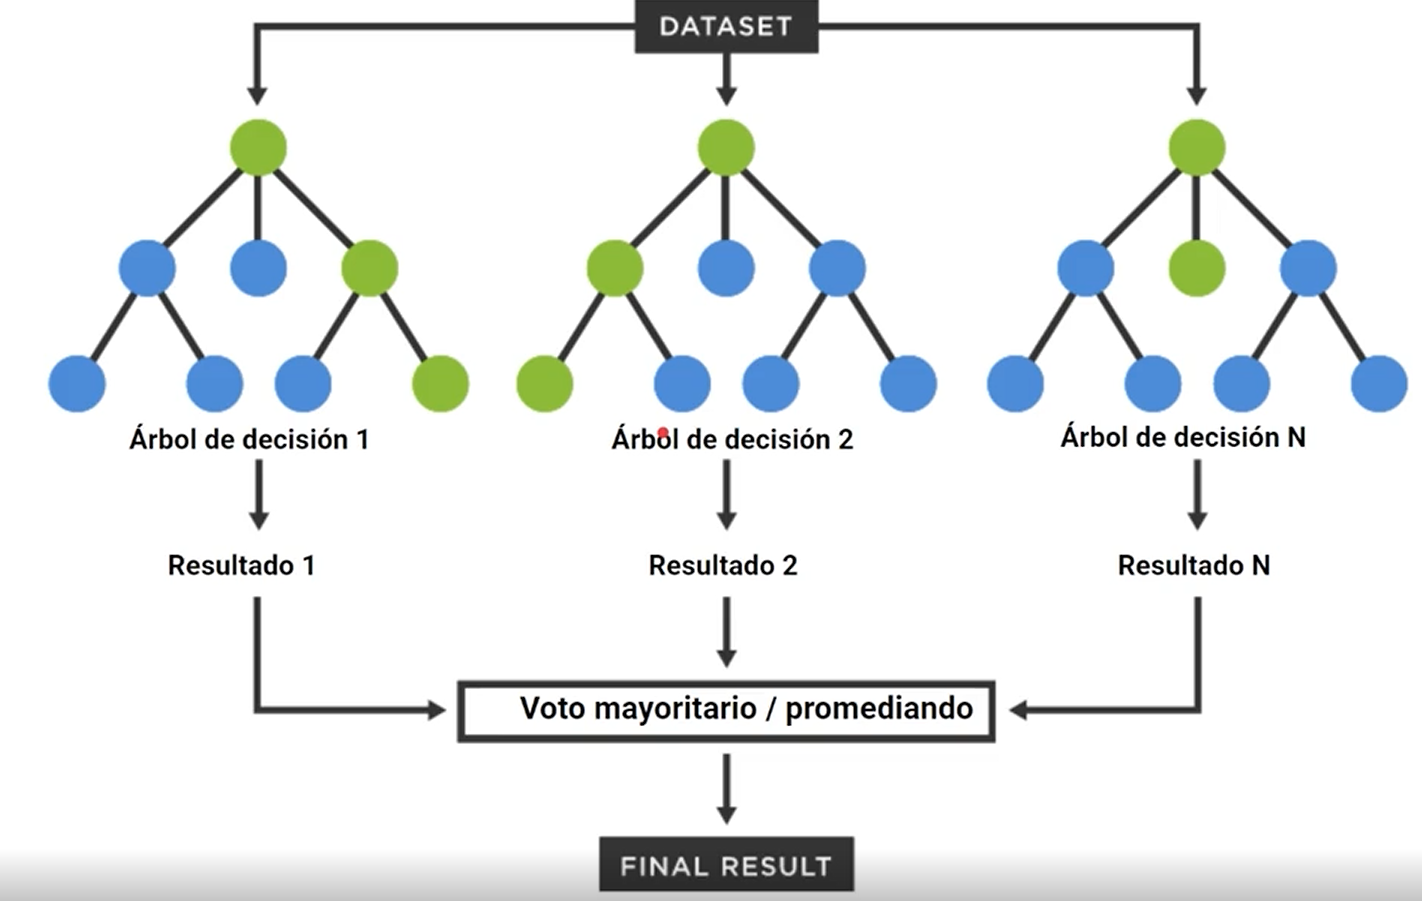

## ¿Cuándo usarlo?

- Rapido y fácil de usar
- Tecnicas de hypertunning de hiper parámetros
- Para problemas de calsificación y también de regresión
- Dataset grandes
- Para evitar overfitting

|Ventajas   |Desventajas   |
|---|---|
|Funciona bien aún sin ajuste de hiper parámetros   |Es muy costoso computacionalmente   |
|Al utilizar mútiples árboles se reduce considerablemente el riesgo de overfitting   | No funciona bien con datasets pequeños  |
|Suele mantenerse estable frente a nuevas muestras de datos   |Puede requerir mucho tienmpo de entrenamiento   |
|   |Su interpretación a veces se vuelve compleja   |


## Aplicación diabetes

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

### Leer [dataset](https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv)

In [72]:
df = pd.read_csv("./data/pima-indians-diabetes.csv",
                 sep=",",
                 names=['1. Number of times pregnant', '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test', '3. Diastolic blood pressure (mm Hg)', '4. Triceps skin fold thickness (mm)', '5. 2-Hour serum insulin (mu U/ml)', '6. Body mass index (weight in kg/(height in m)^2)', '7. Diabetes pedigree function', '8. Age (years)', '9. Class variable (0 or 1)'])
df.head()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [73]:
df.shape

(768, 9)

Reemplazar a nulos

In [74]:
# df.iloc[:, 1:6] = df.iloc[:, 1:6].replace(to_replace=[0], value=np.nan)
# df.head()

In [75]:
df.isnull().sum()

1. Number of times pregnant                                                    0
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
3. Diastolic blood pressure (mm Hg)                                            0
4. Triceps skin fold thickness (mm)                                            0
5. 2-Hour serum insulin (mu U/ml)                                              0
6. Body mass index (weight in kg/(height in m)^2)                              0
7. Diabetes pedigree function                                                  0
8. Age (years)                                                                 0
9. Class variable (0 or 1)                                                     0
dtype: int64

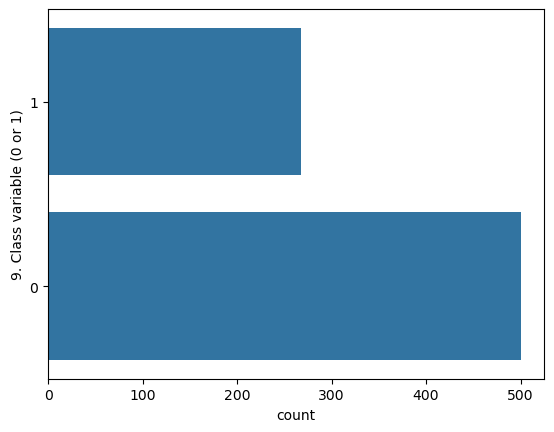

In [80]:
sns.countplot(df["9. Class variable (0 or 1)"].replace([0, 1], ["0", "1"]))
plt.show()

### Entrenamiento

In [83]:
from imblearn.over_sampling import SMOTE

In [84]:
X = df.drop('9. Class variable (0 or 1)', axis=1)
y = df["9. Class variable (0 or 1)"]

In [85]:
# Creamos el objeto SMOTE
smote = SMOTE(random_state=42)

# Realizamos oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.3,
                                                    random_state=42)
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [95]:
random_forest = RandomForestClassifier(10, random_state=0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

### Evaluación del modelo

In [96]:
y_test_pred_rf = random_forest.predict(X_test)
y_train_pred_rf = random_forest.predict(X_train)

In [97]:
print("Entrenamiento:", accuracy_score(y_train, y_train_pred_rf))
print("Test:", accuracy_score(y_test, y_test_pred_rf))

Entrenamiento: 0.9857142857142858
Test: 0.7466666666666667


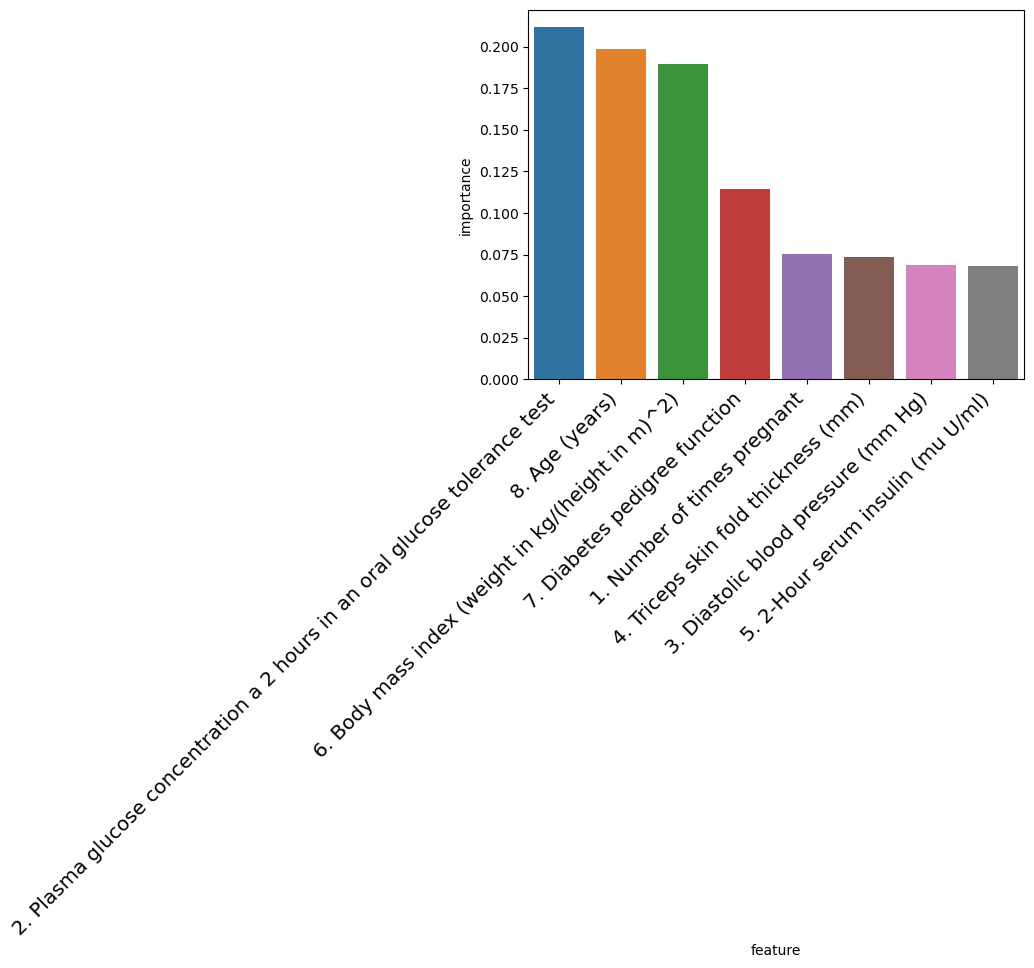

In [106]:
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), 
    "importance": random_forest.feature_importances_}
).sort_values("importance", ascending=False)

sns.barplot(feature_importances_df,
            x="feature", y="importance", hue="feature")
plt.xticks(rotation=45, horizontalalignment="right",
           fontweight="light", fontsize="x-large")
plt.show()

In [107]:
rf = RandomForestClassifier()

parametros = {
  'n_estimators' : range(4,20),
  'criterion' : ['gini', 'entropy', 'log_loss'],
  'max_depth' : range(2,15)
  }

rf_grid = GridSearchCV(rf, parametros, cv = 5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 15),
                         'n_estimators': range(4, 20)},
             scoring='accuracy')

In [108]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=12, n_estimators=16)

In [109]:
y_test_pred_rf_grid = rf_grid.predict(X_test)

In [111]:
print(classification_report(y_test, y_test_pred_rf_grid))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       149
           1       0.76      0.79      0.77       151

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



## Aplicación carros

In [112]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', 
                 header=None, names=['price','maint','doors','persons','lug_boot','safety','class'])
df.head()

,price,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [113]:
X = df.drop("class", axis=1)
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state=42, 
                                                    # stratify = y # Garantiza que la distribución de clases se conserve
                                                    ) 

y_train.value_counts()

class
unacc    852
acc      266
good      50
vgood     41
Name: count, dtype: int64

In [114]:
encoder = ce.OrdinalEncoder(cols=['price', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [115]:
rf = RandomForestClassifier(10, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [116]:
y_test_pred_rf = rf.predict(X_test)
y_train_pred_rf = rf.predict(X_train)

### Evaluación

In [117]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

         acc       0.74      0.80      0.77       118
        good       0.58      0.37      0.45        19
       unacc       0.95      0.97      0.96       358
       vgood       0.85      0.46      0.59        24

    accuracy                           0.89       519
   macro avg       0.78      0.65      0.69       519
weighted avg       0.88      0.89      0.88       519



In [120]:
print(classification_report(y_test, y_test_pred_tree_clf))

              precision    recall  f1-score   support

         acc       0.68      0.64      0.66       118
        good       0.55      0.32      0.40        19
       unacc       0.89      0.96      0.93       358
       vgood       0.64      0.29      0.40        24

    accuracy                           0.83       519
   macro avg       0.69      0.55      0.60       519
weighted avg       0.82      0.83      0.82       519



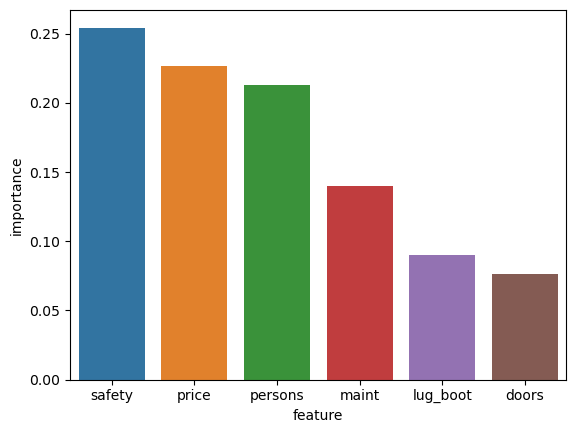

In [122]:
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), 
    "importance": rf.feature_importances_}
).sort_values("importance", ascending=False)

sns.barplot(feature_importances_df,
            x="feature", y="importance", hue="feature")
plt.show()